# Missing Values Exercises

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('./input/train.csv', index_col='Id')
X_test_full = pd.read_csv('./input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [2]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


Make a preliminary investigation

In [3]:
# Shape of training data (num_rows, num_columns)
print("The shape of the X training data is: ", X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print("The missing values of the training data are: ")
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Shape of validating data (num_rows, num_columns)
print("The shape of the X validating data is: ", X_valid.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_valid.isnull().sum())
print("The missing values of the validating data are: ")
print(missing_val_count_by_column[missing_val_count_by_column > 0])

The shape of the X training data is:  (1168, 36)
The missing values of the training data are: 
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64
The shape of the X validating data is:  (292, 36)
The missing values of the validating data are: 
LotFrontage    47
MasVnrArea      2
GarageYrBlt    23
dtype: int64


In [4]:
reduced_X_train = X_train.drop(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], axis=1)
reduced_X_valid = X_valid.drop(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], axis=1)

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
#My Imputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(reduced_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(reduced_X_valid))

In [7]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [8]:
mae = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print(f"The MAE is: ${mae:,.0f}")

The MAE is: $17,838


# Making Final General Test Predictions

In [9]:
# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [10]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print(f"MAE (Your approach): ${mean_absolute_error(y_valid, preds_valid):,.0f}")
# print()

MAE (Your approach): $17,792


In [11]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Categorical Variables

In [12]:
# Read the data
X = pd.read_csv('./input/train.csv', index_col='Id')
X_test = pd.read_csv('./input/test.csv', index_col='Id')

# Remove rows with missing target, seperate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
X.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


# Dropping categorical labels

In [13]:
# Fill in the lines below: drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print(f"MAE from Approach 1 (Drop categorical variables): ${score_dataset(drop_X_train, drop_X_valid, y_train, y_valid):,.0f}")

MAE from Approach 1 (Drop categorical variables): $17,838


# Label Encoding

In [14]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


In [15]:
from sklearn.preprocessing import LabelEncoder

# Because variables from 'Condition2' don't match in train and valid, a list of 
# categorical labels must be created

#Grab all categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if set(X_train[col]) == set(X_valid[col])]

# Problematic columns that will be dropped from dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be label encoded:\n', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:\n', bad_label_cols)

label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

label_encoder = LabelEncoder()
for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(label_X_train[col])
    label_X_valid[col] = label_encoder.transform(label_X_valid[col])
    
print(f"\nMAE from Approach 2 (Label Encoding): ${score_dataset(label_X_train, label_X_valid, y_train, y_valid):,.0f}")

Categorical columns that will be label encoded:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset:
 ['Exterior1st', 'Foundation', 'HeatingQC', 'ExterCond', 'Condition2', 'Heating', 'Functional', 'LandSlope', 'SaleType', 'Utilities', 'Exterior2nd', 'Neighborhood', 'Condition1', 'RoofMatl', 'RoofStyle']

MAE from Approach 2 (Label Encoding): $17,575


# Quick investigation into cardinality

In [16]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col:X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x:x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

In [17]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = sum([d[key]>10 for key in d.keys()])

# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?
num_cols_neighborhood = d['Neighborhood']

OH encoding will introduce *the number of rows in a dataset times the number of unique entries minus the number of rows* columns. Label base encoding will not add any extra columns.
When using OH encoding a high cardinality can result in a larger than expected dataset to process.

In [18]:
# Columns, with cardinality less than 10, that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior1st', 'Exterior2nd', 'Neighborhood']


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols])) # Your code here
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols])) # Your code here

# Replacing indices
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Removing categorical columns
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add OH columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print(f"MAE from Approach 3 (One-Hot Encoding): ${score_dataset(OH_X_train, OH_X_valid, y_train, y_valid):,.0f}")

MAE from Approach 3 (One-Hot Encoding): $17,525


# Pipelines

In [20]:
# Read the data
X_full = pd.read_csv('./input/train.csv', index_col='Id')
X_test_full = pd.read_csv('./input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17621.3197260274


# Cross Validation

In [22]:
# Read the data
train_data = pd.read_csv('./input/train.csv', index_col='Id')
test_data = pd.read_csv('./input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [23]:
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                             cv=5,
                             scoring='neg_mean_absolute_error')

print(f"Average MAE score: {scores.mean():,.0f}")

Average MAE score: 18,276


In [24]:
def get_score(n_estimators):
    """Return  the average MAE over 3 CV folds of randome forest model.
    Keyword argument:
    n_estimators -- the number of trees in the forest"""
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                 cv=3,
                                 scoring='neg_mean_absolute_error')
    return scores.mean()

results = {trees:get_score(trees) for trees in range(50, 450, 50)} # Your code here
print(results)

{50: 18353.8393511688, 100: 18395.2151680032, 150: 18288.730020956387, 200: 18248.345889801505, 250: 18255.26922247291, 300: 18275.241922621914, 350: 18270.29183308043, 400: 18270.197974402367}


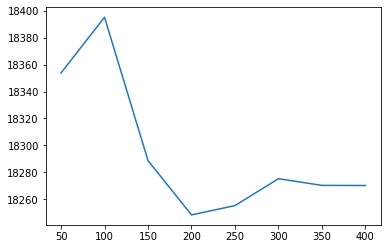

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

# XG Boosting

In [27]:
# Read the data
X = pd.read_csv('./input/train.csv', index_col='Id')
X_test_full = pd.read_csv('./input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [28]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0) # Your code here

# Fit the model
my_model_1.fit(X_train, y_train) # Your code here

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
# Get predictions
predictions_1 = my_model_1.predict(X_valid) # Your code here

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid) # Your code here

# Uncomment to print MAE
print(f"Mean Absolute Error: {mae_1:,.0f}")

Mean Absolute Error: 17,663


In [38]:
# Model 2 designed for better results
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0) # Your code here

# Fit the model
my_model_2.fit(X_train, y_train) # Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_valid) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid) # Your code here

# Uncomment to print MAE
print(f"Mean Absolute Error: {mae_2:,.0f}")

Mean Absolute Error: 16,689


In [34]:
# Model 3 designed for shittier results
# Define the model
my_model_3 = XGBRegressor(n_estimators=100, learning_rate=3, random_state=0)

# Fit the model
my_model_3.fit(X_train, y_train) # Your code here

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)

# Uncomment to print MAE
print(f"Mean Absolute Error: {mae_3:,.0f}")

Mean Absolute Error: 117,201,705,824,294,891,883,935,207,696,367,616


# Data Leakage